In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("tracks_features_popu_100_pourcents.csv", index_col = 0)

# 1) Distribution des variables

## 1.1) Etude globale

C:\Users\level\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\level\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\level\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\level\anaconda3\lib\si

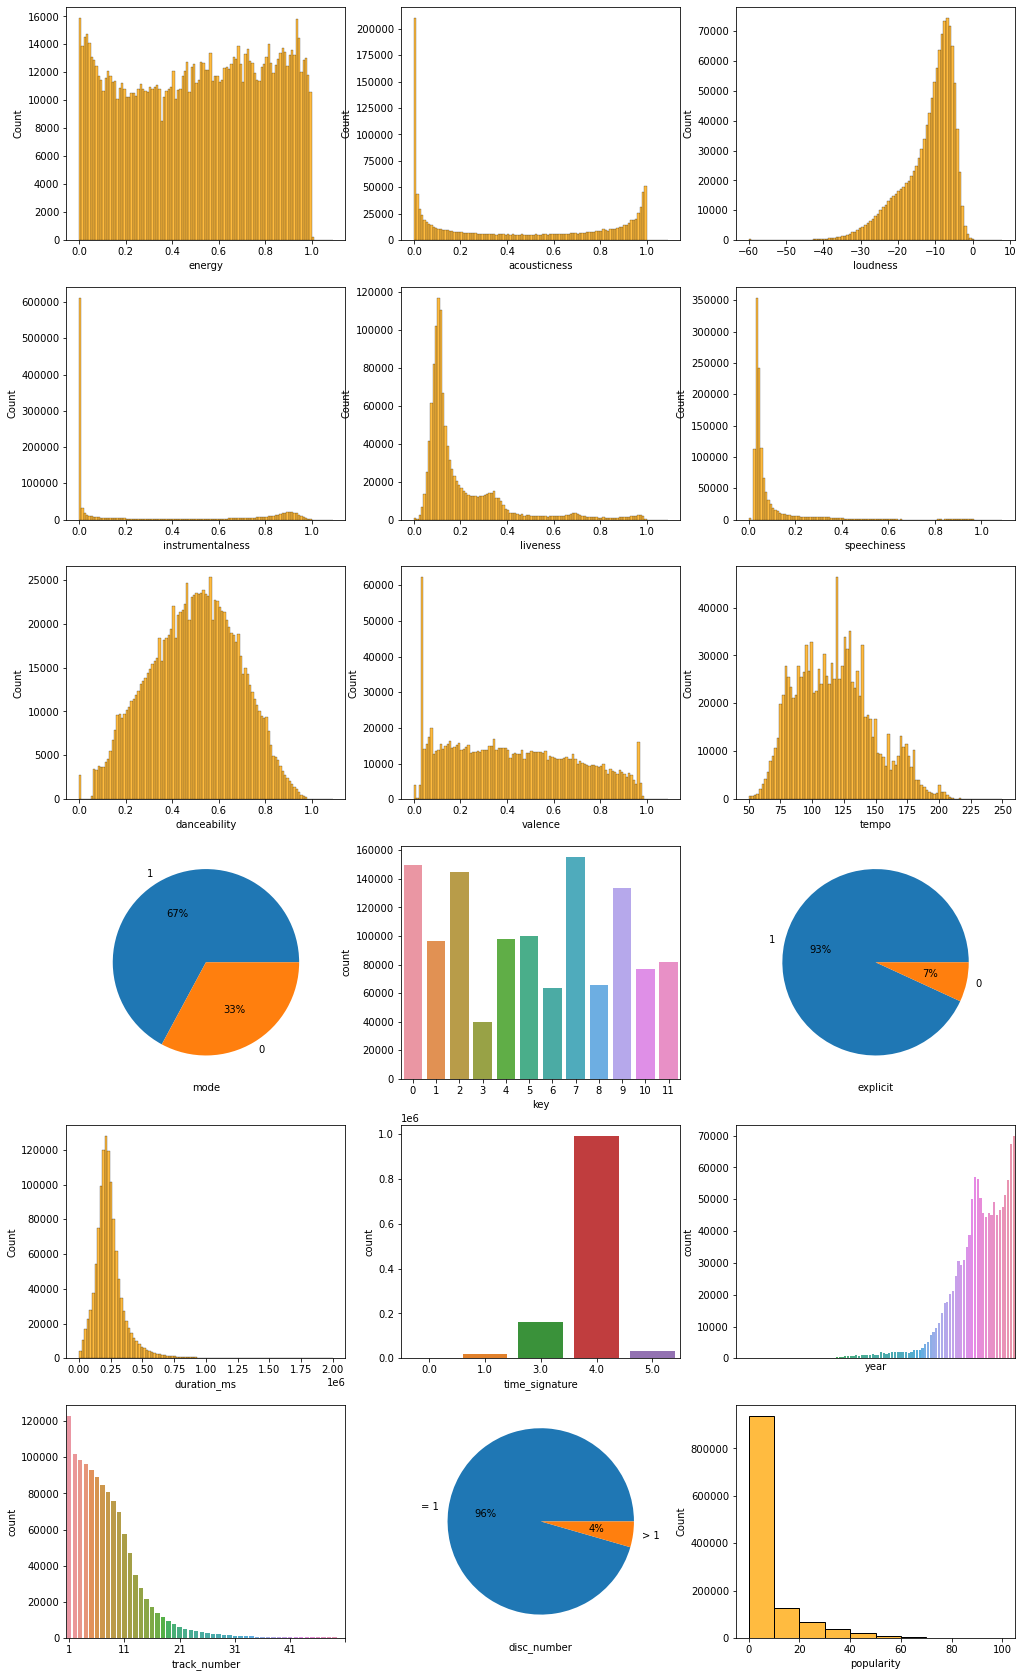

In [3]:
intervalle = np.arange(0,1.1,0.01)

plt.figure(figsize=(17,30))

plt.subplot(6,3,1)
graph_1 = sns.histplot(df['energy'], bins=intervalle, color='orange')
plt.subplot(6,3,2)
graph_2 = sns.histplot(df['acousticness'], bins=intervalle, color='orange')
plt.subplot(6,3,3)
graph_3 = sns.histplot(df['loudness'], bins=np.linspace(-60,8,100), color='orange');
plt.subplot(6,3,4)
graph_4 = sns.histplot(df['instrumentalness'], bins=intervalle, color='orange')
plt.subplot(6,3,5)
graph_5 = sns.histplot(df['liveness'], bins=intervalle, color='orange')
plt.subplot(6,3,6)
graph_6 = sns.histplot(df['speechiness'], bins=intervalle, color='orange')
plt.subplot(6,3,7)
graph_7 = sns.histplot(df['danceability'], bins=intervalle, color='orange')
plt.subplot(6,3,8)
graph_8 = sns.histplot(df['valence'], bins=intervalle, color='orange')
plt.subplot(6,3,9)
graph_9 = sns.histplot(df['tempo'], bins=np.linspace(50,250,100), color='orange')
plt.subplot(6,3,10)
plt.pie(df['mode'].value_counts(normalize=True), labels=['1','0'], autopct='%.0f%%')
plt.xlabel('mode')
plt.subplot(6,3,11)
graph_11 = sns.countplot(df['key'])
plt.subplot(6,3,12)
plt.pie(df['explicit'].value_counts(normalize=True), labels=['1','0'], autopct='%.0f%%')
plt.xlabel('explicit')
plt.subplot(6,3,13)
graph_13 = sns.histplot(df['duration_ms'], bins=np.linspace(1e3,2e6,100), color='orange')
plt.subplot(6,3,14)
graph_14 = sns.countplot(df['time_signature'])
plt.subplot(6,3,15)
graph_15 = sns.countplot(df['year'])
plt.xticks([])
plt.subplot(6,3,16)
graph_16 = sns.countplot(df['track_number'])
plt.xticks([0,10,20,30,40,50])
plt.subplot(6,3,17)
seuil = 1
df_nb_disc_desequilibre = pd.Series(np.where(df['disc_number']<=seuil,1,0))
plt.pie(df_nb_disc_desequilibre.value_counts(normalize=True), labels=['= 1','> 1'], autopct='%.0f%%')
plt.xlabel('disc_number')
plt.subplot(6,3,18)
graph_18 = sns.histplot(df['popularity'], bins=[0,10,20,30,40,50,60,70,80,90,100], color='orange')

plt.show()

## 1.2) Analyse sur "year"

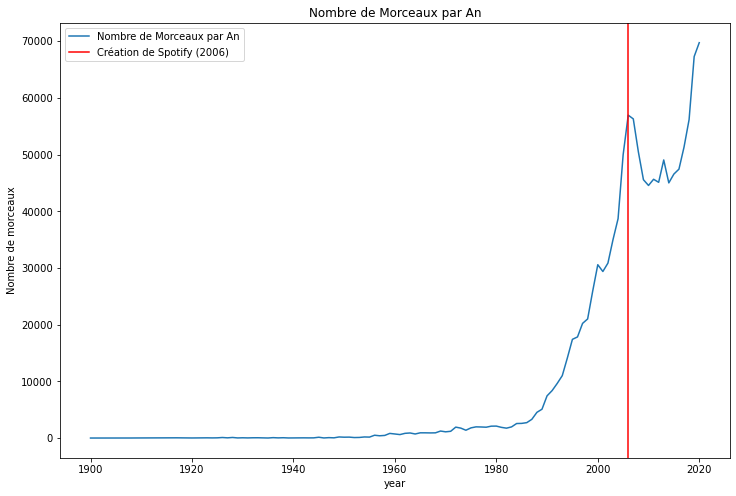

In [4]:
df=df[df['year']!=0]
df_group=df.groupby(by='year').count()['track_number'] #le nom de la colonne n'a pas d'importance

plt.figure(figsize=(12,8))

df_group.plot(label='Nombre de Morceaux par An')
plt.axvline(x=2006,color='red',label='Création de Spotify (2006)') #création de Spotify
plt.ylabel('Nombre de morceaux')
plt.title('Nombre de Morceaux par An')
plt.legend();

## 1.3) Analyse sur "duration_s"

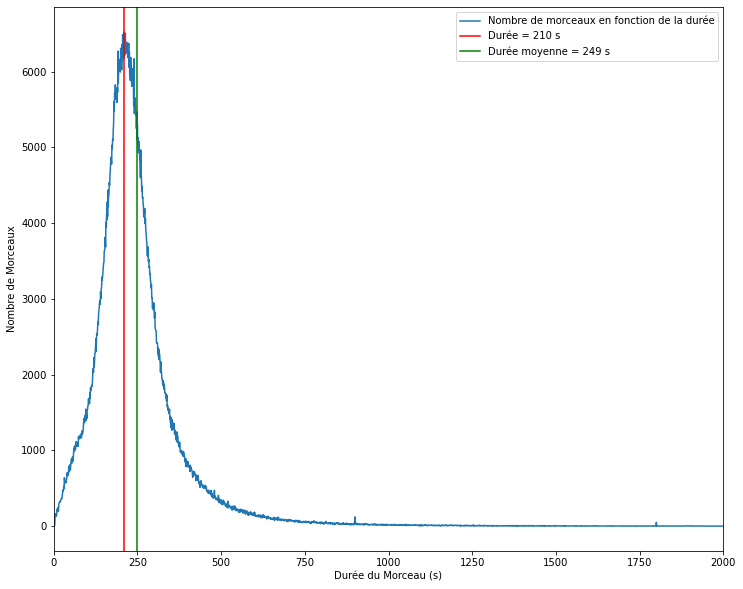

In [5]:
df['duration_s']=np.round(df['duration_ms']/1000,0)
df_dur=df.groupby(by='duration_s').count()['track_number']

plt.figure(figsize=(12,10))

df_dur.plot(label='Nombre de morceaux en fonction de la durée')
plt.xlim(0,2000)
maxid=np.round(df_dur.idxmax(),0)
plt.axvline(x=df_dur.idxmax(),color='red',label='Durée = %0.f s'%maxid)
plt.axvline(x=df['duration_s'].mean(),color='green',label='Durée moyenne = %0.f s'%df['duration_s'].mean())
plt.xlabel('Durée du Morceau (s)')
plt.ylabel('Nombre de Morceaux')
plt.legend();

# 2) Corrélations

## 2.1) Matrice de corrélation

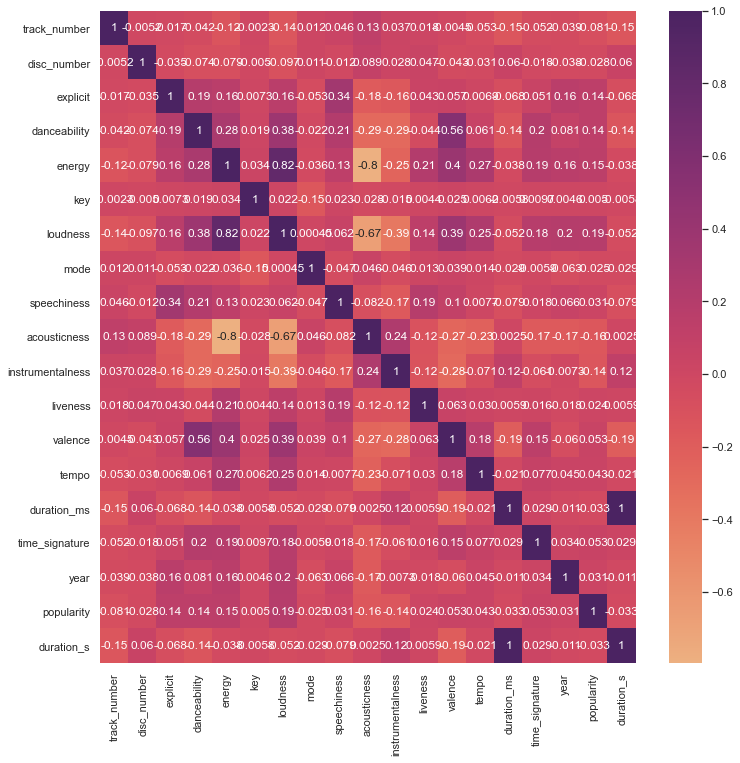

In [6]:
sns.set_theme()

mat = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(mat, annot=True, ax=ax, cmap='flare');

La grande majorité des données ne sont pas corrélées, en revanche on constate tout de même que :
- Les colonnes “energy” et “loudness” ont tendance à être proportionnelles
- Les colonnes “energy” et “accousticness” ont tendance à être inversement proportionnelles

-> *sns.lmplot entre deux variables ça s'affiche pas (c'est super long) donc* ***on réduit le nombre de données pour pouvoir tracer***.

## 2.2) Confirmation des tendances observées

C:\Users\level\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


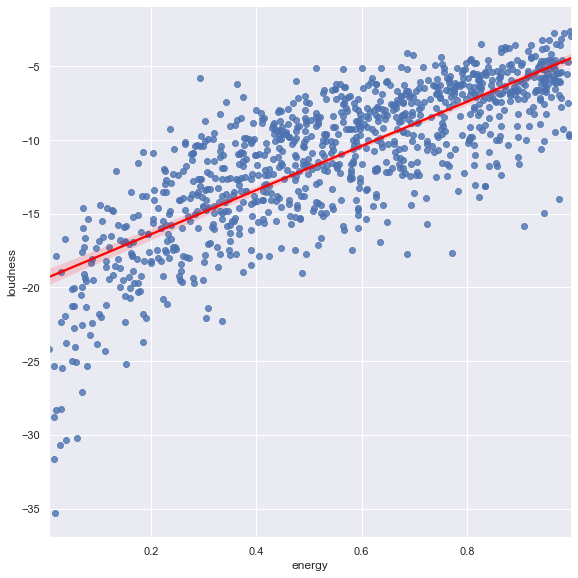

In [7]:
df_reduit = df.iloc[:1000]

sns.lmplot(x='energy', y='loudness', data = df_reduit, line_kws={'color': 'red'}, size =8);

C:\Users\level\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


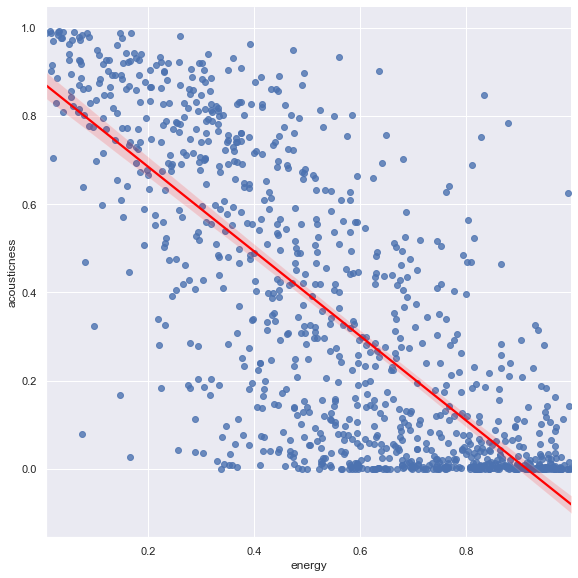

In [8]:
sns.lmplot(x='energy', y='acousticness', data = df_reduit, line_kws={'color': 'red'}, size =8);